In [ ]:
pip install tslearn

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt 

In [5]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [4]:
X_train=np.load('RavdessAudioOnlyNumpy__X_train.npy')

In [2]:
X_test=np.load('RavdessAudioOnlyNumpy__X_test.npy')

In [3]:
X_train.shape 

(1828, 92672)

In [3]:
def moving_average_smoothing(series, window_size):
    """
    Perform moving average smoothing on a single time series.
    
    series: Input time series as a 1-dimensional numpy array.
    window_size: Size of the moving window as an integer.
    
    Returns the smoothed time series.
    """
    window = np.ones(window_size) / window_size
    smoothed_series = np.convolve(series, window, mode='same')
    return smoothed_series

In [6]:
for i,time_series in enumerate (X_train):
    X_train[i]= moving_average_smoothing(X_train[i], 12)


In [4]:
for i,time_series in enumerate (X_test):
    X_test[i]= moving_average_smoothing(X_test[i], 12)


In [7]:
X_test=TimeSeriesScalerMeanVariance().fit_transform(X_test)

In [9]:
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=100, 
                                     alphabet_size_avg=n_sax_symbols)
X_test_sax_small = sax.fit_transform(X_test)


In [8]:
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=1000, 
                                     alphabet_size_avg=n_sax_symbols)
X_test_sax_big = sax.fit_transform(X_test)

In [10]:
np.save('X_test_sax_big', X_test_sax_big)
np.save('X_test_sax_small', X_test_sax_small)

In [7]:
X_train.shape

(1828, 92672)

## from now on x_train is smoothed and scaled

In [ ]:
X_train=TimeSeriesScalerMeanVariance().fit_transform(X_train)

In [ ]:
np.save('x_train_smoothed_ws12_scaled', X_train)

## Approximation


In [13]:
X_train_scaled.shape

(1828, 92672, 1)

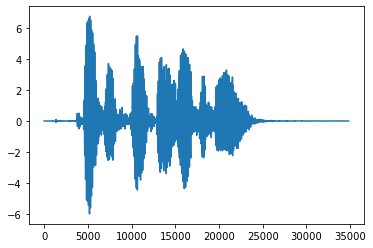

In [16]:
plt.plot(X_train_scaled[0])

In [25]:
pip install --upgrade numba

  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [8]:
## SAX

n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=100, 
                                     alphabet_size_avg=n_sax_symbols)
X_train_sax_small = sax.fit_transform(X_train)
#sax_dataset_inv = sax.inverse_transform(X_train_sax)

In [9]:
np.save('X_train_sax_small', X_train_sax_small)

In [ ]:
sax_dataset_inv = sax.inverse_transform(X_train_sax)

In [35]:
np.unique(X_train_sax[0], return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 32,  33,  39,  60, 367, 270,  90,  63,  33,  13], dtype=int64))

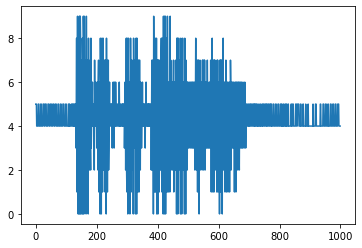

In [28]:
plt.plot(X_train_sax[0])

In [39]:
pip install pyts

Note: you may need to restart the kernel to use updated packages.


In [9]:
## DFT

from pyts.approximation import DiscreteFourierTransform

In [44]:
X_train_original=np.load('RavdessAudioOnlyNumpy__X_train.npy') 

In [8]:
X_train=np.nan_to_num(X_train, nan=0)

In [11]:
dft = DiscreteFourierTransform(n_coefs=64)
X_train_DFT = dft.fit_transform(X_train)

In [53]:
%store X_train_DFT
%store X_train_sax

Stored 'X_train_DFT' (ndarray)
Stored 'X_train_sax' (ndarray)


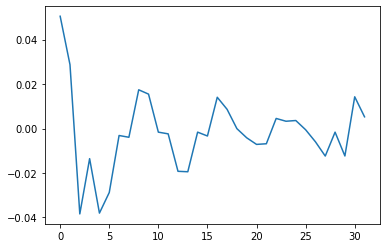

In [50]:
plt.plot(X_train_DFT[0])

In [ ]:
orig_ts=dft_inverse_trasform(X_train_DFT[0], n_coefs=32, n_timestamps=len(X_train))

In [ ]:
np.save("X_train_sax.npy", X_train_sax)

In [14]:
np.save("X_train_dft.npy", X_train_DFT) 